# Portfolio Planner
## Use of Financial Planner
## Author: Nate Walker
### Date: April 17, 2020

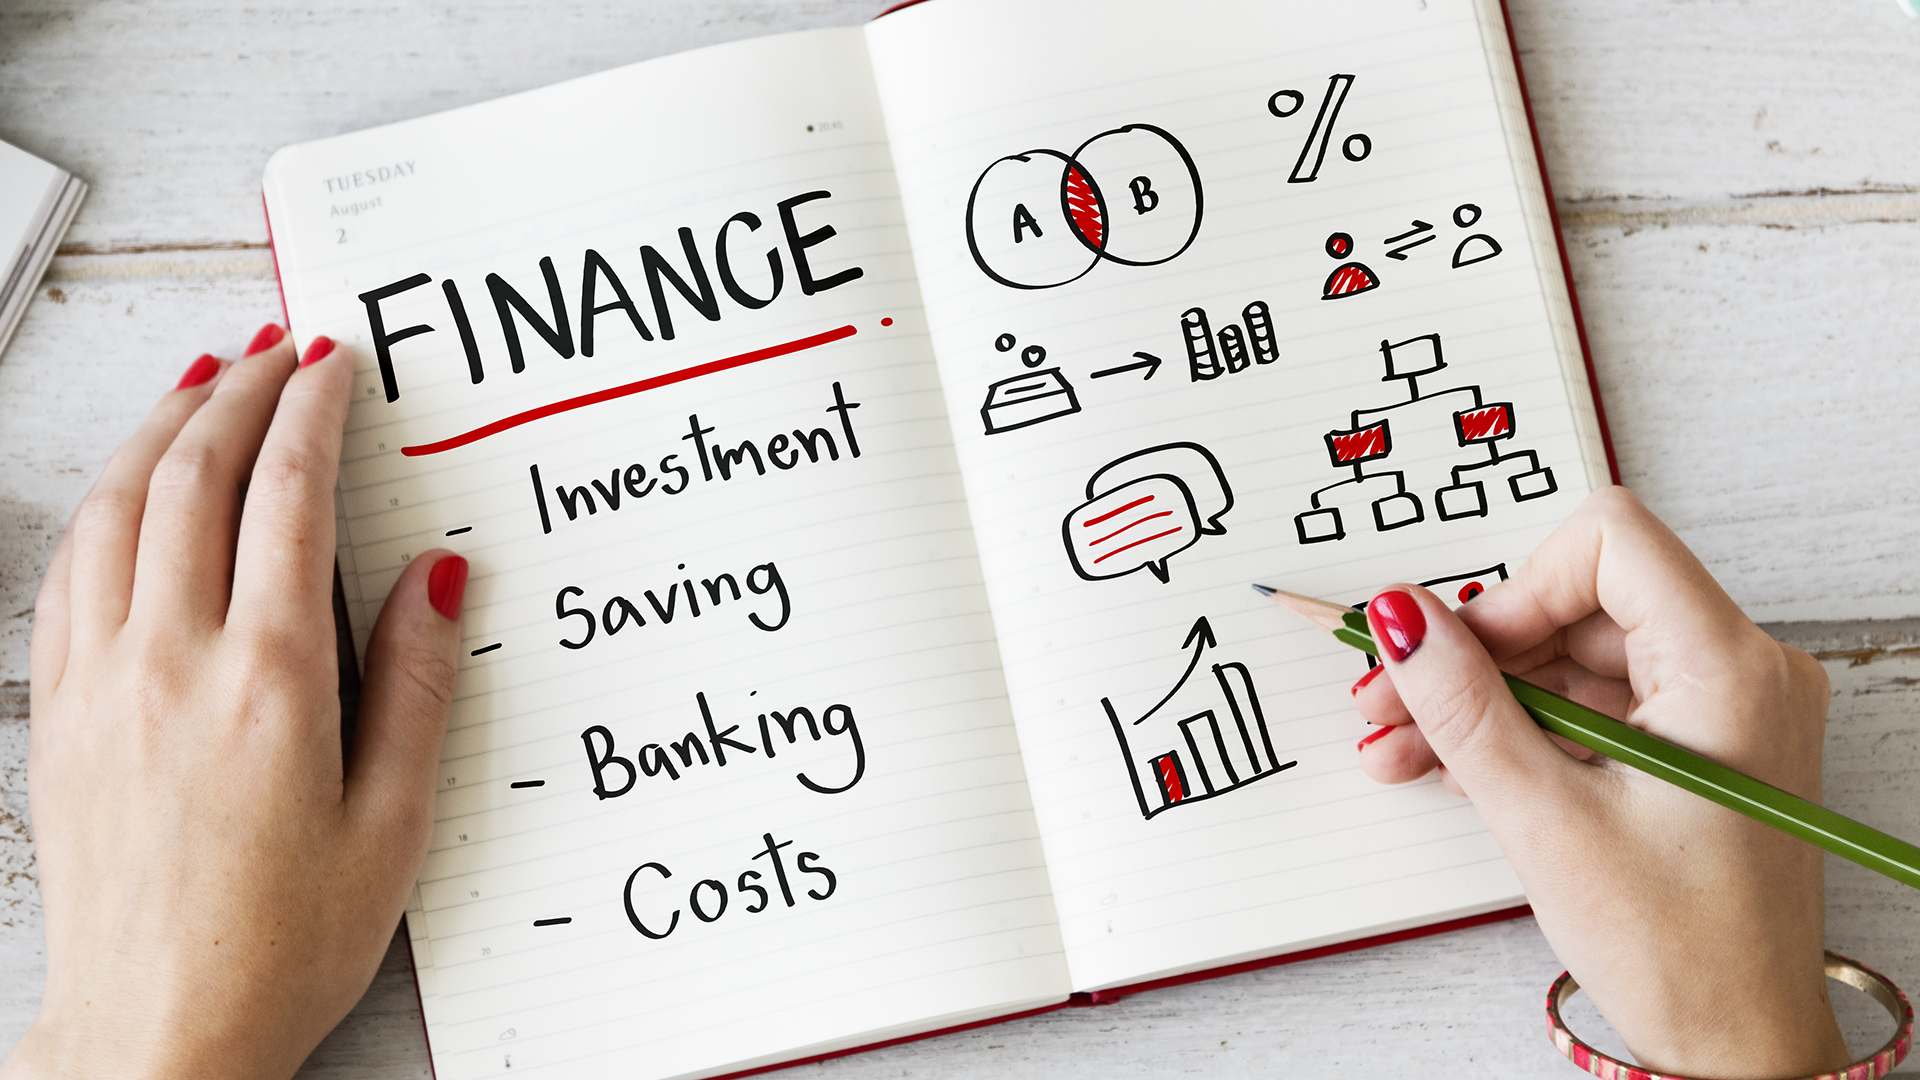

In [4]:
from IPython.display import Image
Image(filename="C:/Users/AnalyticsStudent/Pictures/API's/financial-planner.png",width=200,height=200)


In [ ]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

## Nate's Note to self: Use "alpacaenv" to run code!

In [ ]:
# Load .env enviroment variables
#from dotenv import load_dotenv       # find out how to install "dotenv"
#load_dotenv()

# Set Alpaca API key and secret
#alpaca_api_key = os.getenv("ALPACA_API_KEY")       # set my keys
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key ='PKRJHROY26NPF05DGZQW'
alpaca_secret_key = 'J8BojHLfLQ99K6Kuo1HjSIpM8mhxSNDfl9XvbheS'

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [ ]:
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
tradeable

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [13]:
#list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])

# Display the first 10 asset tickers
display(asset_info_df.head(10))

,symbol
0,WTTR
1,WUBA
2,WVE
3,WVVIP
4,WWD
5,WWJD
6,WWW
7,WYND
8,WYY
9,XAIR


In [29]:
# Set the ticker
tickers = ["SPY","AGG"]
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()


####################

AGG                                         SPY  \
                             open     high     low    close   volume     open   
2019-11-25 00:00:00-05:00  112.91  113.010  112.89  112.980  2848536  311.980   
2019-11-26 00:00:00-05:00  113.11  113.159  113.08  113.120  2104446  313.410   
2019-11-27 00:00:00-05:00  113.03  113.070  112.96  112.995  1844546  314.610   
2019-11-29 00:00:00-05:00  113.01  113.020  112.85  112.925  2123435  314.860   
2019-12-02 00:00:00-05:00  112.31  112.510  112.29  112.480  5720136  314.327   

                                                             
                             high     low   close    volume  
2019-11-25 00:00:00-05:00  313.37  311.98  313.35  37229034  
2019-11-26 00:00:00-05:00  314.28  313.06  314.02  30435576  
2019-11-27 00:00:00-05:00  315.47  314.37  315.46  34799247  
2019-11-29 00:00:00-05:00  315.13  314.06  314.27  24780428  
2019-12-02 00:00:00-05:00  314.37  311.17  311.60  61594879

## Drop Extraneous Levels and Columns

In [30]:
# Drop Outer Table Level
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

########################### use for Single Ticker ###############
#df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
#df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)

# Since this is daily data, we can keep only the date (remove the time) component of the data
#df.index = df.index.date

#df.head()

,AGG,SPY
,close,close
2019-11-25 00:00:00-05:00,112.980,313.35
2019-11-26 00:00:00-05:00,113.120,314.02
2019-11-27 00:00:00-05:00,112.995,315.46
2019-11-29 00:00:00-05:00,112.925,314.27
2019-12-02 00:00:00-05:00,112.480,311.60


## Calculate Daily Returns

In [31]:
# Use the `pct_change` function to calculate daily returns of SPY and AGG
daily_returns = df.pct_change()
daily_returns.head()

,AGG,SPY
,close,close
2019-11-25 00:00:00-05:00,NaN,NaN
2019-11-26 00:00:00-05:00,0.001239,0.002138
2019-11-27 00:00:00-05:00,-0.001105,0.004586
2019-11-29 00:00:00-05:00,-0.000619,-0.003772
2019-12-02 00:00:00-05:00,-0.003941,-0.008496


##  Calculate Value of Average Daily Returns

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

## Caculate the Percent Change (roi)

In [42]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
# Use the `pct_change` function to calculate daily returns of SPY and AGG
daily_returns = df.pct_change()
daily_returns.head()

,AGG,SPY
,close,close
2019-11-25 00:00:00-05:00,NaN,NaN
2019-11-26 00:00:00-05:00,0.001239,0.002138
2019-11-27 00:00:00-05:00,-0.001105,0.004586
2019-11-29 00:00:00-05:00,-0.000619,-0.003772
2019-12-02 00:00:00-05:00,-0.003941,-0.008496


## Calculate Value of Average Daily Returns

In [43]:
# Use the `mean` function to calculate the mean of daily returns for SPY and AGG
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_mu

0.00039192282656044374

## Calculate Value of Standard Deviation of Daily Returns

In [44]:
# Use the `std` function to calculate the standard deviation of daily returns for AAPL
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_mu

0.008497448323745915

In [45]:
# Calculate Portfolio Returns with an equal amount of each stock
spy_weight = 0.5
agg_weight = 0.5

daily_returns = spy_weight * daily_returns["SPY"] + agg_weight * daily_returns["AGG"]
daily_returns.head()

,close
2019-11-25 00:00:00-05:00,NaN
2019-11-26 00:00:00-05:00,0.001689
2019-11-27 00:00:00-05:00,0.001740
2019-11-29 00:00:00-05:00,-0.002196
2019-12-02 00:00:00-05:00,-0.006218


In [47]:
# Calculate volatility
# YOUR CODE HERE
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

close    0.258345
dtype: float64

## Caculate the Cumulative Retunrs

In [49]:
# Save the last day's closing price
# YOUR CODE HERE
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,close
2019-11-25 00:00:00-05:00,NaN
2019-11-26 00:00:00-05:00,1.001689
2019-11-27 00:00:00-05:00,1.003432
2019-11-29 00:00:00-05:00,1.001229
2019-12-02 00:00:00-05:00,0.995003


In [50]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()

# Set last closing prices of `SPY` and `AGG`
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()


In [54]:
# Run the Monte Carlo Simulation
# YOUR CODE HERE
for x in range(number_simulations):
     # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% AGG; 40% SPY)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()
    
 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998875,0.986652,1.018895,0.996981,0.993014,0.987544,0.981560,0.957926,0.986545,1.001313,...,1.008427,1.009064,0.997382,1.007890,1.024247,1.010445,1.020558,0.988293,0.998023,1.007901
2,0.993592,0.995474,1.027676,0.999523,0.997553,0.978995,0.980350,0.953011,0.987945,1.030872,...,1.003831,1.011814,1.004837,1.024161,1.018481,1.001873,1.037021,0.975976,1.021591,1.001994
3,0.987743,1.014615,1.048738,1.005793,0.990347,0.987420,0.999338,0.953252,0.980258,1.045279,...,0.965933,1.022854,0.989205,1.016336,1.005331,1.010657,1.049473,0.971584,1.034652,1.010812
4,0.976675,1.016400,1.038982,0.992871,0.983011,1.010538,1.001667,0.946852,0.970737,1.035082,...,0.955677,1.019571,0.990243,1.015827,1.026320,1.023756,1.043448,0.959419,1.020307,0.997773


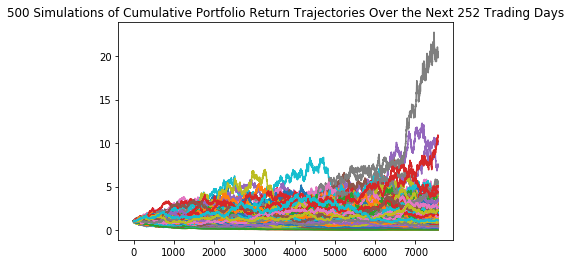

In [56]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [57]:
# Select the last row for the cumulative returns (cumulative returns at 252 Trading days)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    0.326453
1    0.235017
2    0.084001
3    0.808151
4    0.017032
Name: 7560, dtype: float64

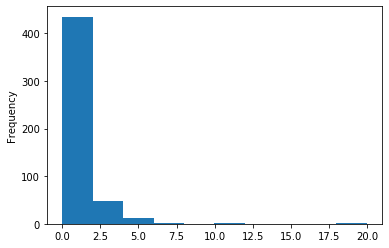

In [59]:
# Select the last row for the cumulative returns (cumulative returns at 252 Trading days)
# YOUR CODE HERE
# Use the `plot` function to plot a frequency distribution of simulated ending prices
ending_cumulative_returns.plot(kind='hist', bins=10)

In [60]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.076341
0.95    3.294782
Name: 7560, dtype: float64

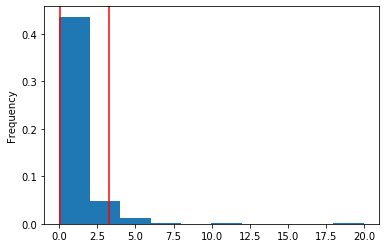

In [61]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 90% confidence interval
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

## What are the expected cumulative returns at 252 trading days for the 10th, 50th, and 90th percentiles?

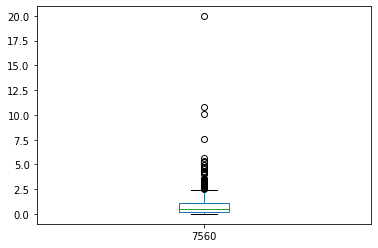

In [63]:
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='box')#, density=True, bins=10)

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [62]:
# YOUR CODE HERE - 90th Percentile
# Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval.iloc[1])
                                                    
# Print the results
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 252 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 252 trading days will end within in the range of $21526.820995062073 and $85895.64247311233


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE